In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK3LW7O/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK3LW7O/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK3LW7O/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for s, l in imdb['train']:
    print((s.numpy()))
    print(l)
    break

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())


In [ ]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
training_sentences[:10]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [ ]:
training_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


In [ ]:
len(word_index)

88583

In [ ]:
reverse_word_index  = dict([(value, key) for (key, value) in word_index.items()])
for i, values in enumerate(reverse_word_index.items()):
    print(values)
    if i > 10:
        break

(1, '<oov>')
(2, 'the')
(3, 'and')
(4, 'a')
(5, 'of')
(6, 'to')
(7, 'is')
(8, 'br')
(9, 'in')
(10, 'it')
(11, 'i')
(12, 'this')


In [ ]:
#reverse_word_index[0]

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text]) 

print(decode_review(padded[3]))
print(padded[3])
print(training_sentences[3])


? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <oov> into a big arm chair and <oov> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <oov> to cross no dangerous waters just a warm and witty <oov> through new york life at its best a family film in every sense and one that deserves the praise it received
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   12    7    2  241    5   20   16    4 8776 2707 2653
   52    2  358    5    2  180   68  138 1401   17   92  203  968   15
   23    1   81    4  192 3109 3037    3    1   16    4  376    5  632
  387  352   37 6355    3 5559 1928   15  208 8596 3433    2  112  365
   48   24   55    1    6 1657   55 1818 4312   41    4 2263

In [ ]:

embedding_dim = 64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.SimpleRNN(32),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
import tensorflow as tf

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 645,281
Trainable params: 645,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(padded, training_labels, validation_data=(testing_padded, testing_labels),
                    epochs=NUM_EPOCHS)

Epoch 1/10
782/782 [==============================] - 106s 136ms/step - loss: 0.4831 - accuracy: 0.7822 - val_loss: 0.5296 - val_accuracy: 0.7573
Epoch 2/10
782/782 [==============================] - 107s 137ms/step - loss: 0.3292 - accuracy: 0.8634 - val_loss: 0.5605 - val_accuracy: 0.7593
Epoch 3/10
782/782 [==============================] - 106s 136ms/step - loss: 0.1733 - accuracy: 0.9362 - val_loss: 0.7013 - val_accuracy: 0.7718
Epoch 4/10
782/782 [==============================] - 107s 136ms/step - loss: 0.0851 - accuracy: 0.9706 - val_loss: 0.9900 - val_accuracy: 0.6627
Epoch 5/10
782/782 [==============================] - 107s 137ms/step - loss: 0.0586 - accuracy: 0.9796 - val_loss: 1.0043 - val_accuracy: 0.7644
Epoch 6/10
782/782 [==============================] - 108s 138ms/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 1.3415 - val_accuracy: 0.6794
Epoch 7/10
782/782 [==============================] - 107s 136ms/step - loss: 0.0577 - accuracy: 0.9799 - val_loss: 1.2547 -

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape

(10000, 16)

In [ ]:
weights[0]

array([ 0.0797779 , -0.09036215, -0.03190587,  0.02168837, -0.04899637,
       -0.00257433,  0.04509499, -0.05786617, -0.03248916,  0.02968561,
        0.01493551,  0.01127275, -0.0166167 , -0.00675362, -0.02724759,
       -0.03718949], dtype=float32)

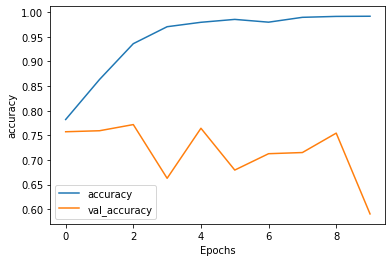

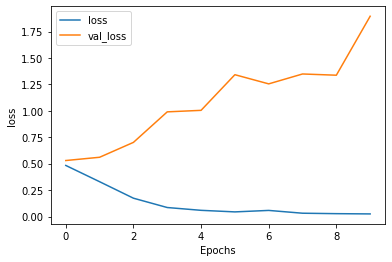

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
